In [1]:
import sys
sys.path.insert(1, "../")

import importlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
def reload_modules():
    import ghost_unfairness
    importlib.reload(ghost_unfairness.fair_dataset)
    importlib.reload(ghost_unfairness.utils)
    
reload_modules()

from ghost_unfairness.fair_dataset import FairDataset, default_mappings

from ghost_unfairness.utils import *

In [3]:
protected = ["sex"]
privileged_classes = [['Male']]
metadata = default_mappings.copy()
metadata['protected_attribute_maps'] = [{1.0: 'Male', 0.0: 'Female'}]

alpha = 0.5
beta = 1

kwargs = {'protected_attribute_names': protected,
          'privileged_classes': [['Male']],
          'metadata':metadata,
          'favorable_classes': [1],
          'beta': beta,
          'alpha': alpha
         }

random_state = 47

In [4]:
model_type = GaussianNB

In [5]:
train_fd, test_fd = get_datasets(10000, 1, kwargs, test_random_state=53)
pmod, pmod_results = get_groupwise_preformance(train_fd, test_fd, model_type,
                                               privileged=True)
umod, umod_results = get_groupwise_preformance(train_fd, test_fd, model_type,
                                               privileged=False)
mod, mod_results = get_groupwise_preformance(train_fd, test_fd, model_type,
                                             privileged=None)

In [6]:
print('pmod_results', *pmod_results, sep='\t')
print('umod_results', *umod_results, sep='\t')
print('mod_results', *mod_results, sep='\t')

pmod_results	-0.14679999999999999	0.7064	0.8978	0.9952	0.8004
umod_results	-0.08120000000000005	0.8596127247579529	0.8812	0.9216	0.8408
mod_results	-0.09359999999999996	0.8202074529389167	0.9046	0.979	0.8302


In [7]:
print(np.sqrt(pmod.sigma_))
print(np.sqrt(umod.sigma_))
print(np.sqrt(mod.sigma_))

print()
print(pmod.theta_)
print(umod.theta_)
print(mod.theta_)

[[1.99842399]
 [1.99701377]]
[[5.11499565]
 [4.97410084]]
[[4.17130264]
 [4.0839225 ]]

[[ 3.01710348]
 [12.99475632]]
[[-0.03007637]
 [ 9.95268372]]
[[ 1.49351355]
 [11.47372002]]


In [8]:
import scipy.stats as stats
import math

def plot_normal(mu, sigma, label=None):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=label)
    
def plot_non_linear_boundary(mu1, mu2, sigma1, sigma2, p, d, label=None):
    x = np.linspace(-200, 200, 10000)
    y = np.log(p/(1-p)) - d*np.log(sigma1/sigma1) 
    y -= 1/(2*sigma1**2)*(x-mu1)**2 
    y += 1/(2*sigma2**2)*(x-mu2)**2
    plt.plot(x, y, label=label)
    plt.legend()

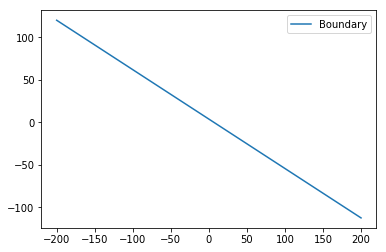

In [9]:
plot_non_linear_boundary(1.5, 11.5, 4.15, 4.15, 0.5, 1, 'Boundary')

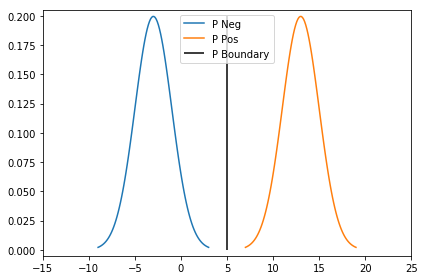

In [10]:
plot_normal(-3, 2, label='P Neg')
plot_normal(13, 2, label='P Pos')
plt.vlines(5, 0, 0.2, label = 'P Boundary')
plt.xlim(-15, 25)
plt.ylim(-0.005, 0.205)
plt.legend()
plt.tight_layout()

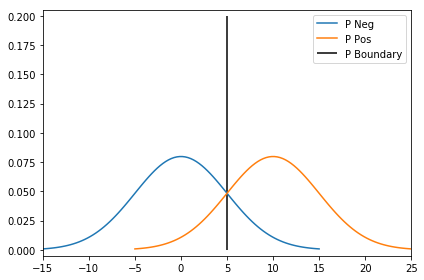

In [11]:
plot_normal(0, 5, label='P Neg')
plot_normal(10, 5, label='P Pos')
plt.vlines(5, 0, 0.2, label = 'P Boundary')
plt.xlim(-15, 25)
plt.ylim(-0.005, 0.205)
plt.legend()
plt.tight_layout()

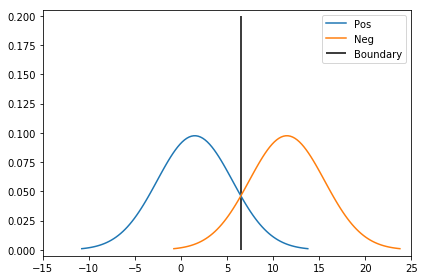

In [12]:
plot_normal(1.5, 4.09, label='Pos')
plot_normal(11.5, 4.09, label='Neg')
plt.vlines(6.5, 0, 0.2, label='Boundary')
plt.xlim(-15, 25)
plt.ylim(-0.005, 0.205)
plt.legend()
plt.tight_layout()

(0, 0.2)

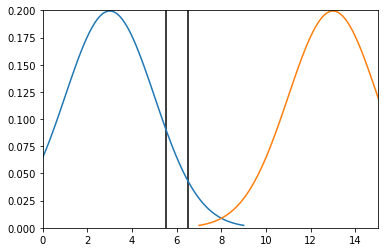

In [13]:
plot_normal(3, 2)
plot_normal(13, 2)
# plt.vlines(6.5, 0, 0.2)
# plot_normal(0, 5)
# plot_normal(10, 5)
plt.vlines(5.5, 0, 0.2)
plt.vlines(6.5, 0, 0.2)
plt.xlim(0, 15)
plt.ylim(0, 0.2)

(0, 0.2)

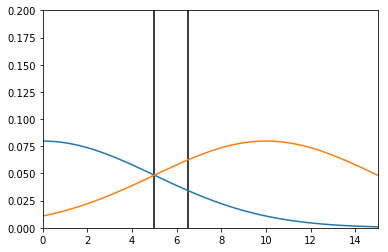

In [14]:
# plot_normal(3, 2)
# plot_normal(10, 2)
# plt.vlines(6.5, 0, 0.2)
plot_normal(0, 5)
plot_normal(10, 5)
plt.vlines(5, 0, 0.2)
plt.vlines(6.5, 0, 0.2)
plt.xlim(0, 15)
plt.ylim(0, 0.2)

In [1]:
from scipy.stats import norm

def get_accuracy(mu1, mu2, sigma1, sigma2, mu_avg):
    rv1 = norm(loc=mu1, scale=sigma1)
    # print(rv1.cdf(mu_avg))
    rv2 = norm(loc=mu2, scale=sigma2)
    # print(rv2.cdf(mu_avg))

    return (0.5 - 0.5*rv1.cdf(mu_avg) + 0.5 * rv2.cdf(mu_avg))

In [10]:
get_accuracy(13, 3, 2, 2, 8)

0.9937903346742238

In [11]:
get_accuracy(10, 0, 5, 5, 8)

0.8003112249553831

In [12]:
get_accuracy(13, 3, 2, 2, 5)

0.9206565374133548

In [13]:
get_accuracy(10, 0, 5, 5, 5)

0.8413447460685429

In [14]:
get_accuracy(13, 3, 2, 2, 6.5)

0.979681909046896

In [15]:
get_accuracy(10, 0, 5, 5, 6.5)

0.8306179315956583